# 가설
- $H_{01}$ (포아송 분포): 플레이어의 경기당 킬 수는 포아송 분포를 따른다.
- $H_{02}$ (음이항 분포): 플레이어의 경기당 킬 수는 음이항 분포를 따른다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df=pd.read_csv('train_V2.csv')
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
df = df.copy()

# kills 컬럼의 상위 1% 초과 값을 '8+'로 대체 (새로운 컬럼 사용 권장)
df['kills_bin'] = df['kills'].apply(lambda x_val: str(x_val)) # lambda 변수명을 x에서 x_val로 변경하여 혼동 방지

plt.figure(figsize=(15,10))
sns.countplot(x='kills_bin', data=df, order=sorted(df['kills_bin'].unique(), key=float)) # key=float(x)를 key=float으로 수정
plt.title("Kill Count", fontsize=15)
plt.show()


TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1500x1000 with 0 Axes>

## 포아송 분포 적합도 비교

추정된 λ (평균 킬 수): 0.9247833241810259
KS 검정 통계량: 0.3966173471539022
p-value: 0.0


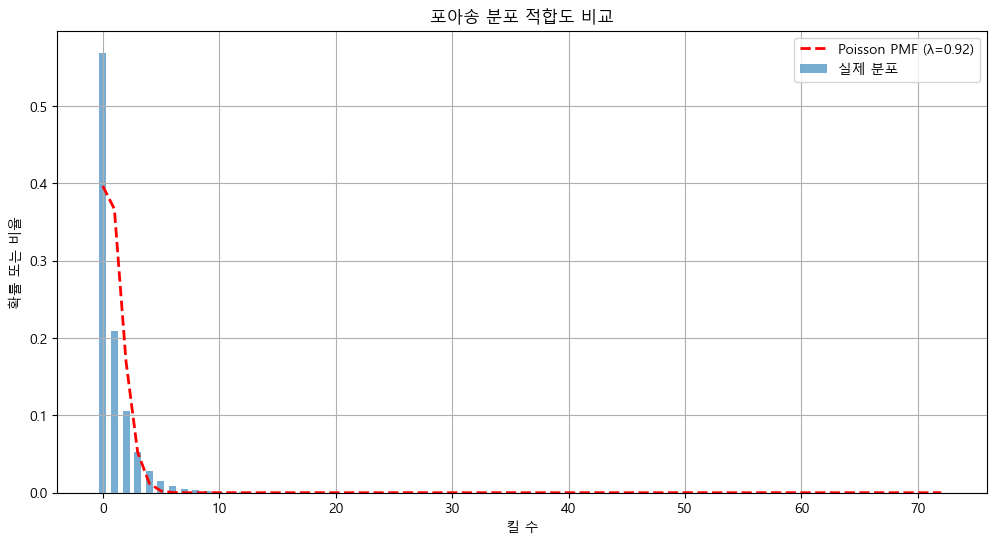

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, kstest

# 예시: kills 데이터 로드 (여기선 리스트로 가정)
kills = df['kills']

# 1. 포아송 평균 (λ) 추정
lambda_hat = np.mean(kills)

# 2. KS 검정 (kills는 이산형이므로 CDF로 비교)
D, p_value = kstest(kills, 'poisson', args=(lambda_hat,))

print(f"추정된 λ (평균 킬 수): {lambda_hat}")
print(f"KS 검정 통계량: {D}")
print(f"p-value: {p_value}")

# 3. 히스토그램 vs 포아송 PMF 시각화
value_counts = kills.value_counts().sort_index()
x = value_counts.index
y = value_counts.values / len(kills)  # 정규화된 실측 비율
pmf = poisson.pmf(x, lambda_hat)

plt.figure(figsize=(12,6))
plt.bar(x, y, width=0.6, label='실제 분포', alpha=0.6)
plt.plot(x, pmf, 'r--', label=f'Poisson PMF (λ={lambda_hat:.2f})', linewidth=2)
plt.xlabel("킬 수")
plt.ylabel("확률 또는 비율")
plt.title("포아송 분포 적합도 비교")
plt.legend()
plt.grid(True)
plt.show()

## 음이항 분포

추정된 r: 0.6108, p: 0.3978


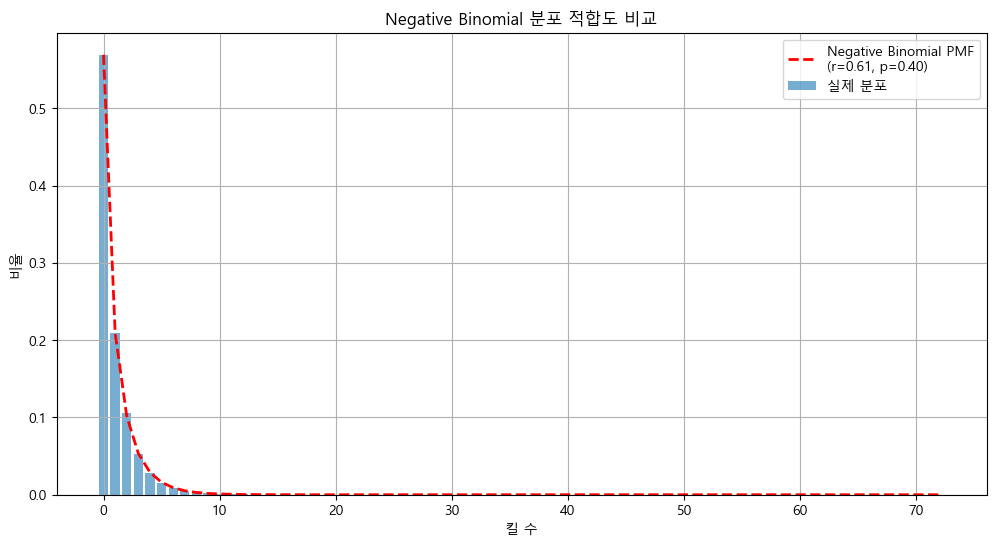

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import nbinom
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 예: kills 데이터
data = df['kills'].values

# 1. 로그우도 기반으로 NB 분포 피팅
def neg_log_likelihood(params, data):
    r, p = params
    if r <= 0 or p <= 0 or p >= 1:
        return np.inf
    return -np.sum(nbinom.logpmf(data, r, p))

# 초기값 (포아송 대비 안전한 범위)
mu = np.mean(data)
var = np.var(data)
r_init = mu**2 / (var - mu) if var > mu else 1
p_init = r_init / (r_init + mu)

result = minimize(neg_log_likelihood, x0=[r_init, p_init], args=(data,),
                  bounds=[(1e-5, None), (1e-5, 1-1e-5)])

r_hat, p_hat = result.x

print(f"추정된 r: {r_hat:.4f}, p: {p_hat:.4f}")

# 2. NB 분포 PMF 시각화
from collections import Counter
value_counts = Counter(data)
x = np.array(sorted(value_counts.keys()))
y_real = np.array([value_counts[i] / len(data) for i in x])
y_nb = nbinom.pmf(x, r_hat, p_hat)

plt.figure(figsize=(12,6))
plt.bar(x, y_real, label='실제 분포', alpha=0.6)
plt.plot(x, y_nb, 'r--', linewidth=2, label=f'Negative Binomial PMF\n(r={r_hat:.2f}, p={p_hat:.2f})')
plt.xlabel("킬 수")
plt.ylabel("비율")
plt.title("Negative Binomial 분포 적합도 비교")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from scipy.stats import nbinom

# 1킬 이상 한 사람만 필터링
filtered = df[df['kills'] > 1]['kills']

# 음이항 분포 피팅: method of moments
mean_kills = filtered.mean()
var_kills = filtered.var()

# r = μ^2 / (σ² - μ), p = r / (r + μ)
r_hat = mean_kills**2 / (var_kills - mean_kills)
p_hat = r_hat / (r_hat + mean_kills)

mean_kills, var_kills, r_hat, p_hat

(2.6117931117422315, 0.9235755657319639, -4.040630471271433, 2.827914908805864)